##### This Analysis is on the restraunt reviews in Yelp ,The Analysis is based on EDA(e.g. Number of reviews in each category),Sentiment Analaysis and Text Classification to predict the review is Negative or Not .In addtion to that the Multiclass-Classification to predict  the rating(stars) based on the review.

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from nltk import pos_tag
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [275]:
yelp=pd.read_csv('D:/Python/Dataset/reviews.csv')

In [276]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [277]:
### EDA

In [278]:
### Which year has the highest number of reviews

In [279]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [280]:
yelp['date']=pd.to_datetime(yelp['date'])

<AxesSubplot:xlabel='date', ylabel='count'>

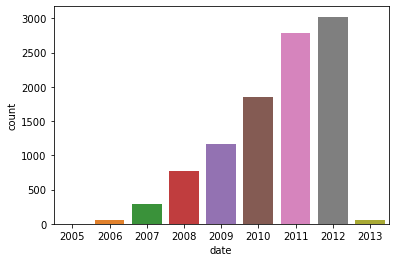

In [281]:
sns.countplot(x=yelp['date'].dt.year,data=yelp)

In [282]:
### Number of stars in each category

<AxesSubplot:xlabel='stars', ylabel='count'>

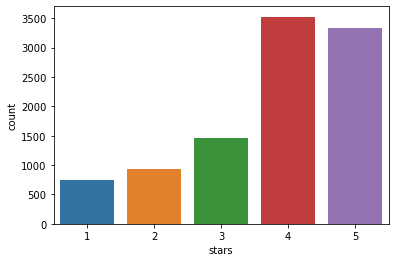

In [283]:
sns.countplot(x='stars',data=yelp)

In [284]:
###length of top 10 comments

In [285]:
index_10=list(yelp['text'].apply(lambda x: len(x.split())).sort_values(ascending=False).head(10).index)

In [286]:
yelp.loc[index_10,'text']

3686    I went to Eddie's House last night with the BF...
6611    Wow. Wow Freakin' Wow.\n\nI have never, ever h...
1870    Okay, it almost seems a shame to burst the bub...
4033    I hate having to give out three star reviews. ...
6587    I don't get it!!\nMy husband, daughter and I w...
6237    "Fuck you all, we hope you die.\nThat's the Tr...
55      In our continuing quest to identify cool, loca...
1513    Uh-oh. Where am I? \n\nThe view from atop the ...
2311    Pizzeria Bianco: Before and After \nCited as "...
1656    Let me start by saying after my experience I s...
Name: text, dtype: object

In [287]:
###length of bottom 10 comments

In [288]:
index_b_10=list(yelp['text'].apply(lambda x: len(x.split())).sort_values(ascending=True).head(10).index)

In [289]:
yelp.loc[index_b_10,'text']

1919    D-scust-ing.
4968      Excellent.
6450               X
7881            Meh.
4091        Intense!
5105       Excellent
3854      Awesome!!!
9688          Yummy!
2931          Super!
6708              Go
Name: text, dtype: object

In [290]:
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


In [291]:
lemmatizer=WordNetLemmatizer()

In [292]:
#s="I went to Eddie's House last night with the BF"

In [293]:
def lemmatization(x):
    
    return ' '.join([lemmatizer.lemmatize(word,pos='a') for word in word_tokenize(x)])  ### parts of speech as verb

yelp['text'] = yelp['text'].apply(lemmatization)

In [294]:
### Text Cleaning

In [295]:
import re

def clean_text(x):
    x=x.lower()
    x=x.strip()
    x=re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", x)
    
    return (x)

In [296]:
yelp["text"]=yelp["text"].apply(clean_text)

In [297]:
###Sentitment Analysis

In [298]:
import textblob
from textblob import TextBlob


In [299]:
 yelp['sentiment_score']=yelp["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [300]:
yelp=yelp.drop(columns=['business_id','review_id','user_id'])

In [301]:
yelp

,date,stars,text,type,cool,useful,funny,sentiment_score
0,2011-01-26,5,my wife took me here on my birthday for breakf...,review,2,5,0,0.413580
1,2011-07-27,5,i have no idea why some people give bad review...,review,0,0,0,0.220870
2,2012-06-14,4,love the gyro plate rice is so good and i als...,review,0,1,0,0.600000
3,2010-05-27,5,rosie dakota and i love chaparral dog park ...,review,1,2,0,0.493333
4,2012-01-05,5,general manager scott petello is a good egg ...,review,0,0,0,0.361111
...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,first visit had lunch here today used my gro...,review,1,2,0,0.217708
9996,2012-01-18,4,should be called house of deliciousness i cou...,review,0,0,0,0.375541
9997,2010-11-16,4,i recently visited olive and ivy for business ...,review,0,0,0,0.256820
9998,2012-12-02,2,my nephew just moved to scottsdale recently so...,review,0,0,0,-0.100000


In [302]:
yelp['sentiment_score']

0       0.413580
1       0.220870
2       0.600000
3       0.493333
4       0.361111
          ...   
9995    0.217708
9996    0.375541
9997    0.256820
9998   -0.100000
9999    0.241667
Name: sentiment_score, Length: 10000, dtype: float64

In [303]:
yelp.loc[yelp.sentiment_score<=-0.5,:]

,date,stars,text,type,cool,useful,funny,sentiment_score
395,2009-02-03,1,just say no this place is truly awful too ba...,review,4,4,2,-0.850000
773,2012-05-29,1,this was absolutely horrible i got the suprem...,review,1,2,0,-1.000000
1287,2008-08-28,5,obsessed like ivegotthetwangytartwithdrawals...,review,3,3,5,-0.500000
1517,2012-02-04,1,nasty workers and over priced trash,review,0,0,1,-1.000000
2333,2012-12-09,1,not only was the music the bad i have ever hea...,review,0,0,0,-0.540000
3075,2011-12-05,5,unfortunately out of business,review,0,2,0,-0.500000
3266,2011-07-24,1,absolutely awful these guys have no idea what...,review,0,0,0,-1.000000
3668,2013-01-04,2,i rather go to native or zipps we have had ba...,review,0,0,0,-0.700000
3709,2012-08-20,1,terrible rolls the dragon was so so the cali...,review,0,0,0,-0.625000
3975,2012-11-08,2,over priced mediocre food service so so we ...,review,0,2,0,-0.500000


In [304]:
yelp.loc[9998,'text']

'my nephew just moved to scottsdale recently so me and a bunch of friends brought him here to show him a local bar that he and the girlfriend could come shoot pool  watch football  play volleyball etc  well  we were nt there minutes and  kids were running around the pool tables  messing up our games and screaming  i could nt believe the staff was allowing this to happen  they were hitting the pool sticks on everything and crying when their mom attempted  in vain  to quiet them  you d think the mom would leave at this point with her kids  um  no  the staff did seem annoyed as well but said nothing  then  it happened  she said  you guys good behave or mommy will be fired    holy shit  she works there   even bad  shame on that owner for allowing this to happen  and that employee needs to recognize this  you work at a bar  not a daycare  a bar   '

In [305]:
#### In this analysis of sentiment score we can see that some words have  sentiment score but the comment entred is ony fiew words,here w can eliminate  those sentence from the data.

In [306]:
yelp['word_len']=yelp['text'].apply(lambda x:len(x.strip()))

In [307]:
yelp.loc[(yelp.word_len>10)  &(yelp.word_len<20),'text']

217             love krista 
284            great service
420        love the food    
679         excellent burger
1075         nicnacs galore 
2016      amazing  romantic 
2240    we loved this place 
2247         love the wings 
3054     no bad for a chain 
3921           great service
4626     i love jimmy johns 
4667      best in the valley
4759        standard target 
4766          very bad food 
6004          great sandwich
6448           awesome pool 
6682          best in town  
7181    fresh and delicious 
7607           fun dive bar 
8021     they are wonderful 
8480     best sushi in town 
8514         out of business
8658    this place is great 
8721     this place is home 
9050       we love dr steve 
9172        love this store 
9238       glorified pei wei
9924       horrible service 
9933      it is a salad bar 
9947         love five guys 
Name: text, dtype: object

In [308]:
yelp.loc[2,'text']

'love the gyro plate  rice is so good and i also dig their candy selection  '

In [309]:
yelp.loc[(yelp.word_len<10),'text']

1290       no good
1919    dscusting 
2733     good food
2892    great job 
2931        super 
3854    awesome   
4091      intense 
4968    excellent 
5105     excellent
6450             x
6708            go
7881          meh 
9688        yummy 
Name: text, dtype: object

In [310]:
### We can remoe those rows which have text length less than 10 letters,because that are direct words with not much information.

In [311]:
yelp=yelp.loc[(yelp.word_len>10)]

In [312]:
yelp['sentiment']=np.where(yelp.sentiment_score>0.1,"Positive",np.where(yelp.sentiment_score<-0.1,"Negative","Neurtal"))

C:\Users\gaura\AppData\Local\Temp\ipykernel_1444\1282234547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentiment']=np.where(yelp.sentiment_score>0.1,"Positive",np.where(yelp.sentiment_score<-0.1,"Negative","Neurtal"))


In [313]:
yelp

,date,stars,text,type,cool,useful,funny,sentiment_score,word_len,sentiment
0,2011-01-26,5,my wife took me here on my birthday for breakf...,review,2,5,0,0.413580,871,Positive
1,2011-07-27,5,i have no idea why some people give bad review...,review,0,0,0,0.220870,1315,Positive
2,2012-06-14,4,love the gyro plate rice is so good and i als...,review,0,1,0,0.600000,73,Positive
3,2010-05-27,5,rosie dakota and i love chaparral dog park ...,review,1,2,0,0.493333,414,Positive
4,2012-01-05,5,general manager scott petello is a good egg ...,review,0,0,0,0.361111,453,Positive
...,...,...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,first visit had lunch here today used my gro...,review,1,2,0,0.217708,649,Positive
9996,2012-01-18,4,should be called house of deliciousness i cou...,review,0,0,0,0.375541,877,Positive
9997,2010-11-16,4,i recently visited olive and ivy for business ...,review,0,0,0,0.256820,1408,Positive
9998,2012-12-02,2,my nephew just moved to scottsdale recently so...,review,0,0,0,-0.100000,850,Neurtal


In [314]:
### Now we can do the analysis to by using the cross tab

In [315]:
pd.crosstab(yelp.stars,yelp.sentiment)

sentiment,Negative,Neurtal,Positive
stars,,,
1,188,379,180
2,75,401,450
3,27,345,1087
4,23,376,3125
5,19,253,3055


In [316]:
yelp.loc[(yelp.sentiment=="Positive")&(yelp.stars==1),'text']

84      really  i ca nt believe this place has receive...
89      i was really excited about this event  maybe m...
113     unless you are a regular or look like your wal...
119     take your money elsewhere  unless you ve got k...
126     my friend kept telling me how good their lunch...
                              ...                        
9818    mucho gusto es mucho mierda  let me say first ...
9833    my significant other had a $  off coupon from ...
9846    no  do nt go  do nt do it  this was my first v...
9898    do not eat here if you think a bathroom in any...
9987    the food is delicious  the service  discrimina...
Name: text, Length: 180, dtype: object

In [317]:
#### POsitive sentiments

In [318]:
positive_reviews=yelp.loc[yelp.stars>=4,:]
negative_reviews=yelp.loc[yelp.stars<4,:]

In [319]:
positive_reviews['text'] = positive_reviews['text'].apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
negative_reviews['text'] = negative_reviews['text'].apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc


C:\Users\gaura\AppData\Local\Temp\ipykernel_1444\1573472937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['text'] = positive_reviews['text'].apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
C:\Users\gaura\AppData\Local\Temp\ipykernel_1444\1573472937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['text'] = negative_reviews['text'].apply(lambda x: " ".join(word for word, pos in pos_tag(x

In [320]:
### We have to maeke the wordcloud to see the mot number of words in each type of text

In [321]:
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS

In [322]:
stop=stopwords.words('english')

In [323]:
stop=stop+['get','also','go','one','would']

Positive_review = positive_reviews['text'].apply(lambda x: clean_text(x))
Positive_review = pre_process(Positive_review)

In [324]:
#font_path = "/path/to/your/font.ttf"

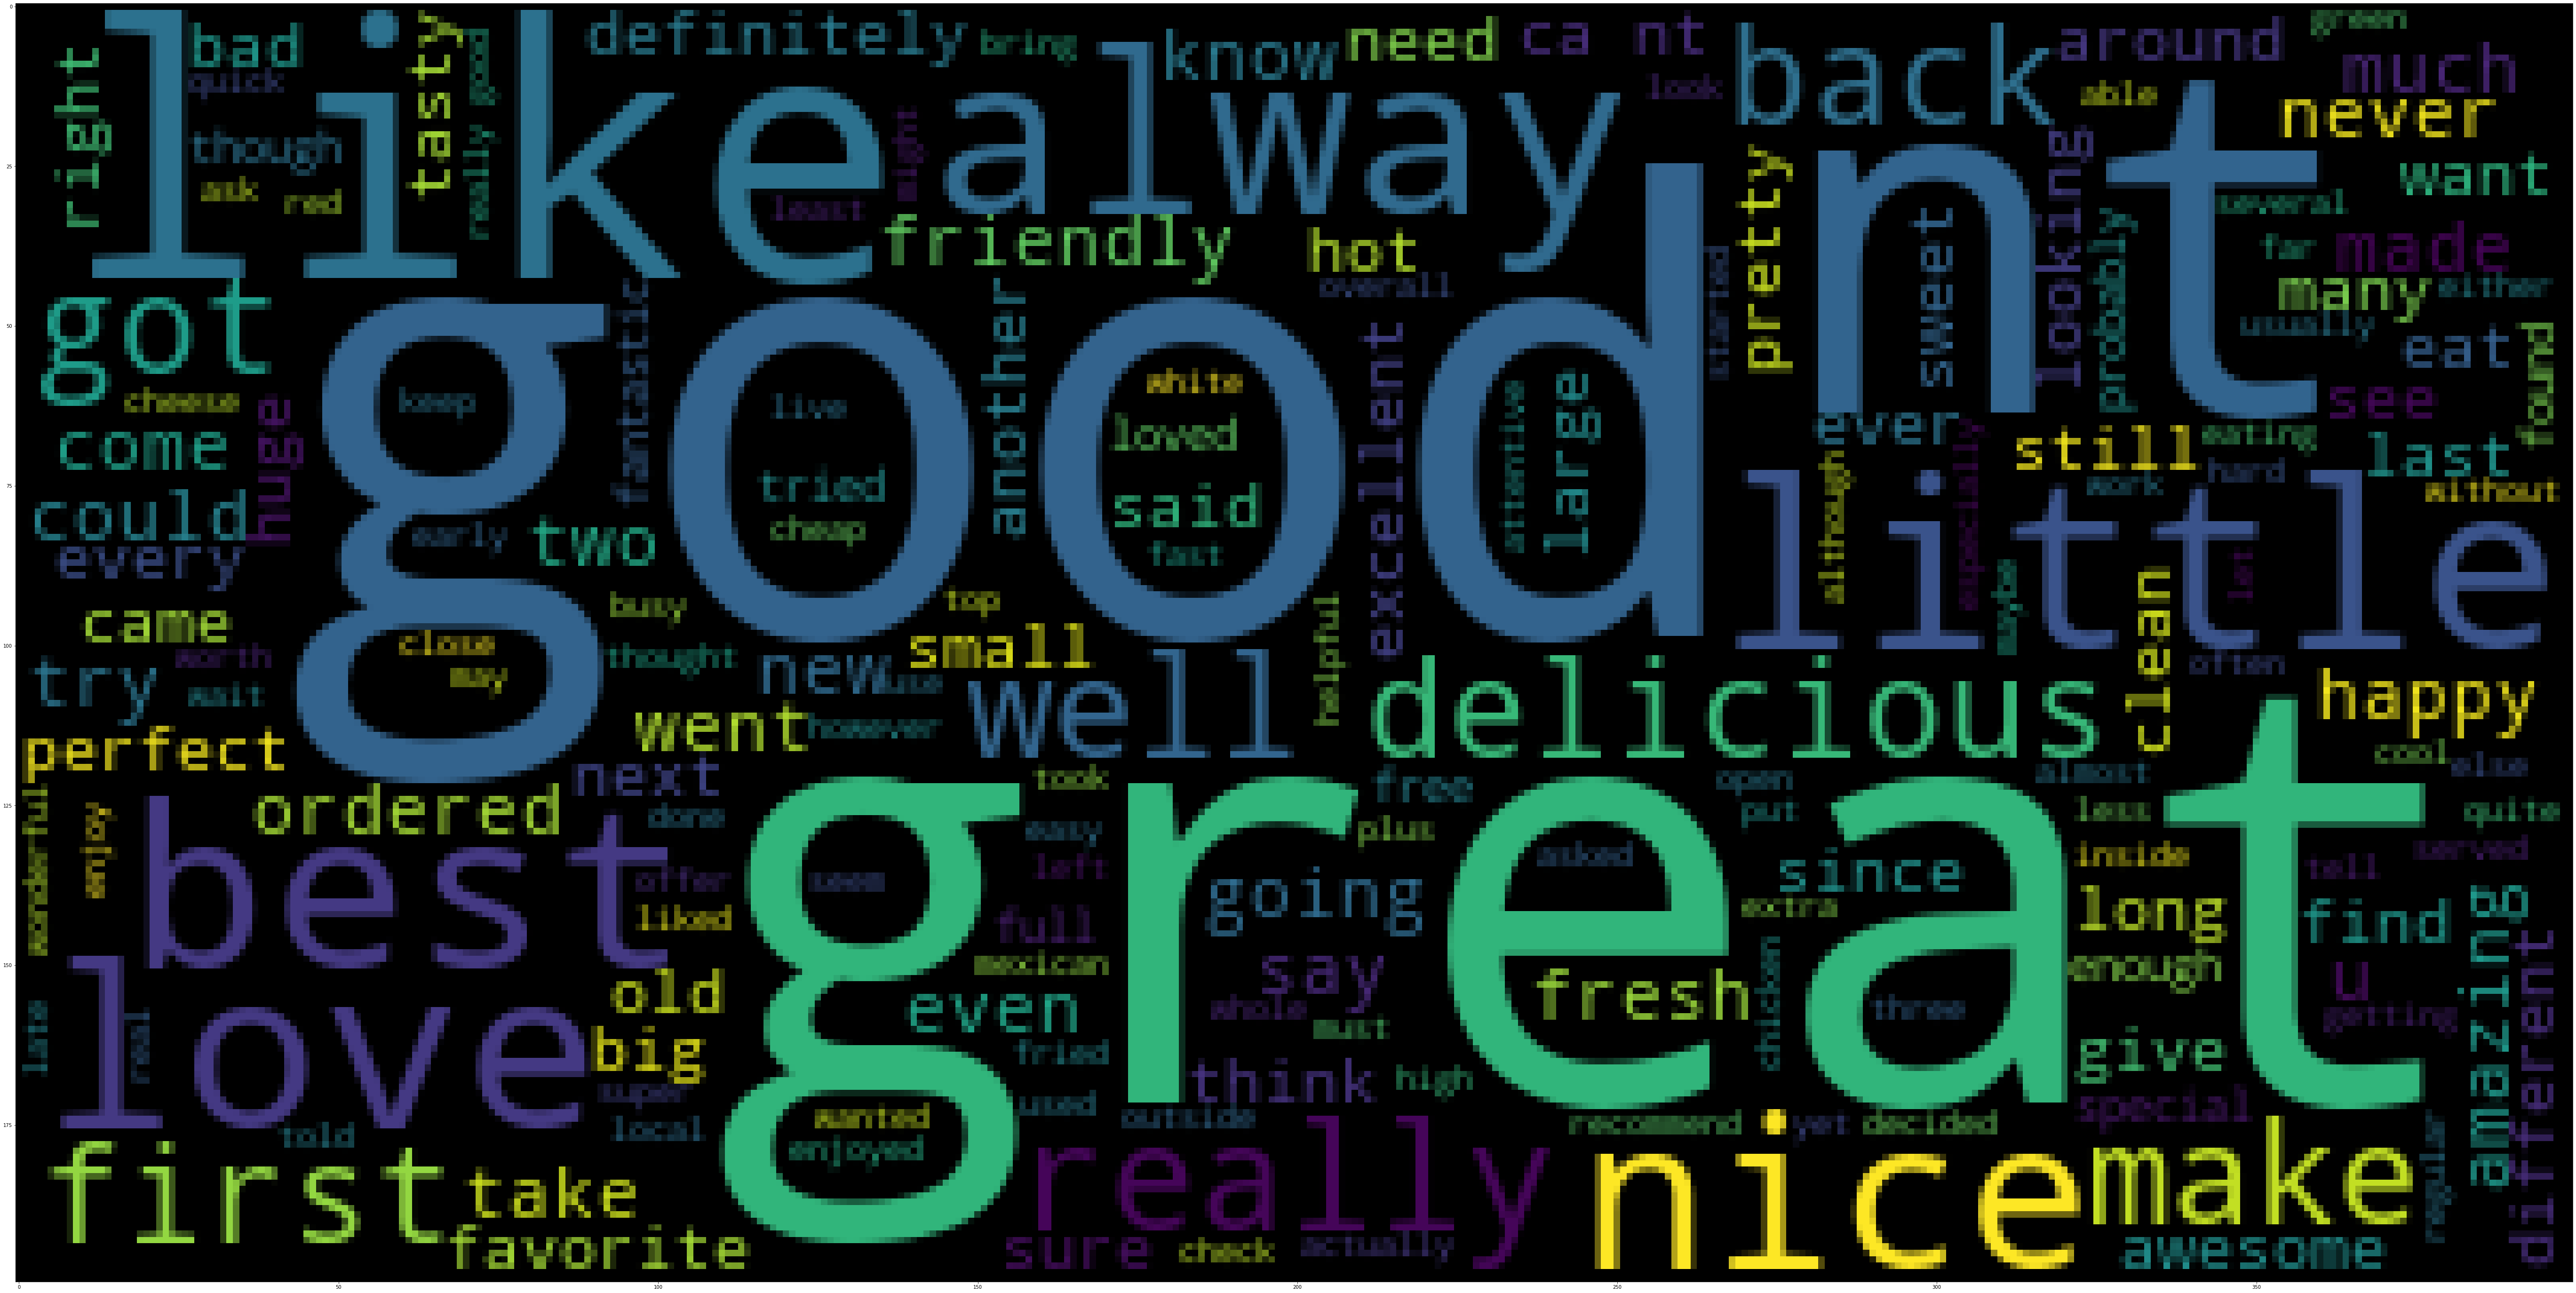

In [325]:
wordcloud = WordCloud(stopwords=stop).generate(''.join(positive_reviews['text']))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [326]:
#### Word Cloud for the Negative reviews

In [327]:
stop=stop+['good','nt','like','could','great','nice''even','know']

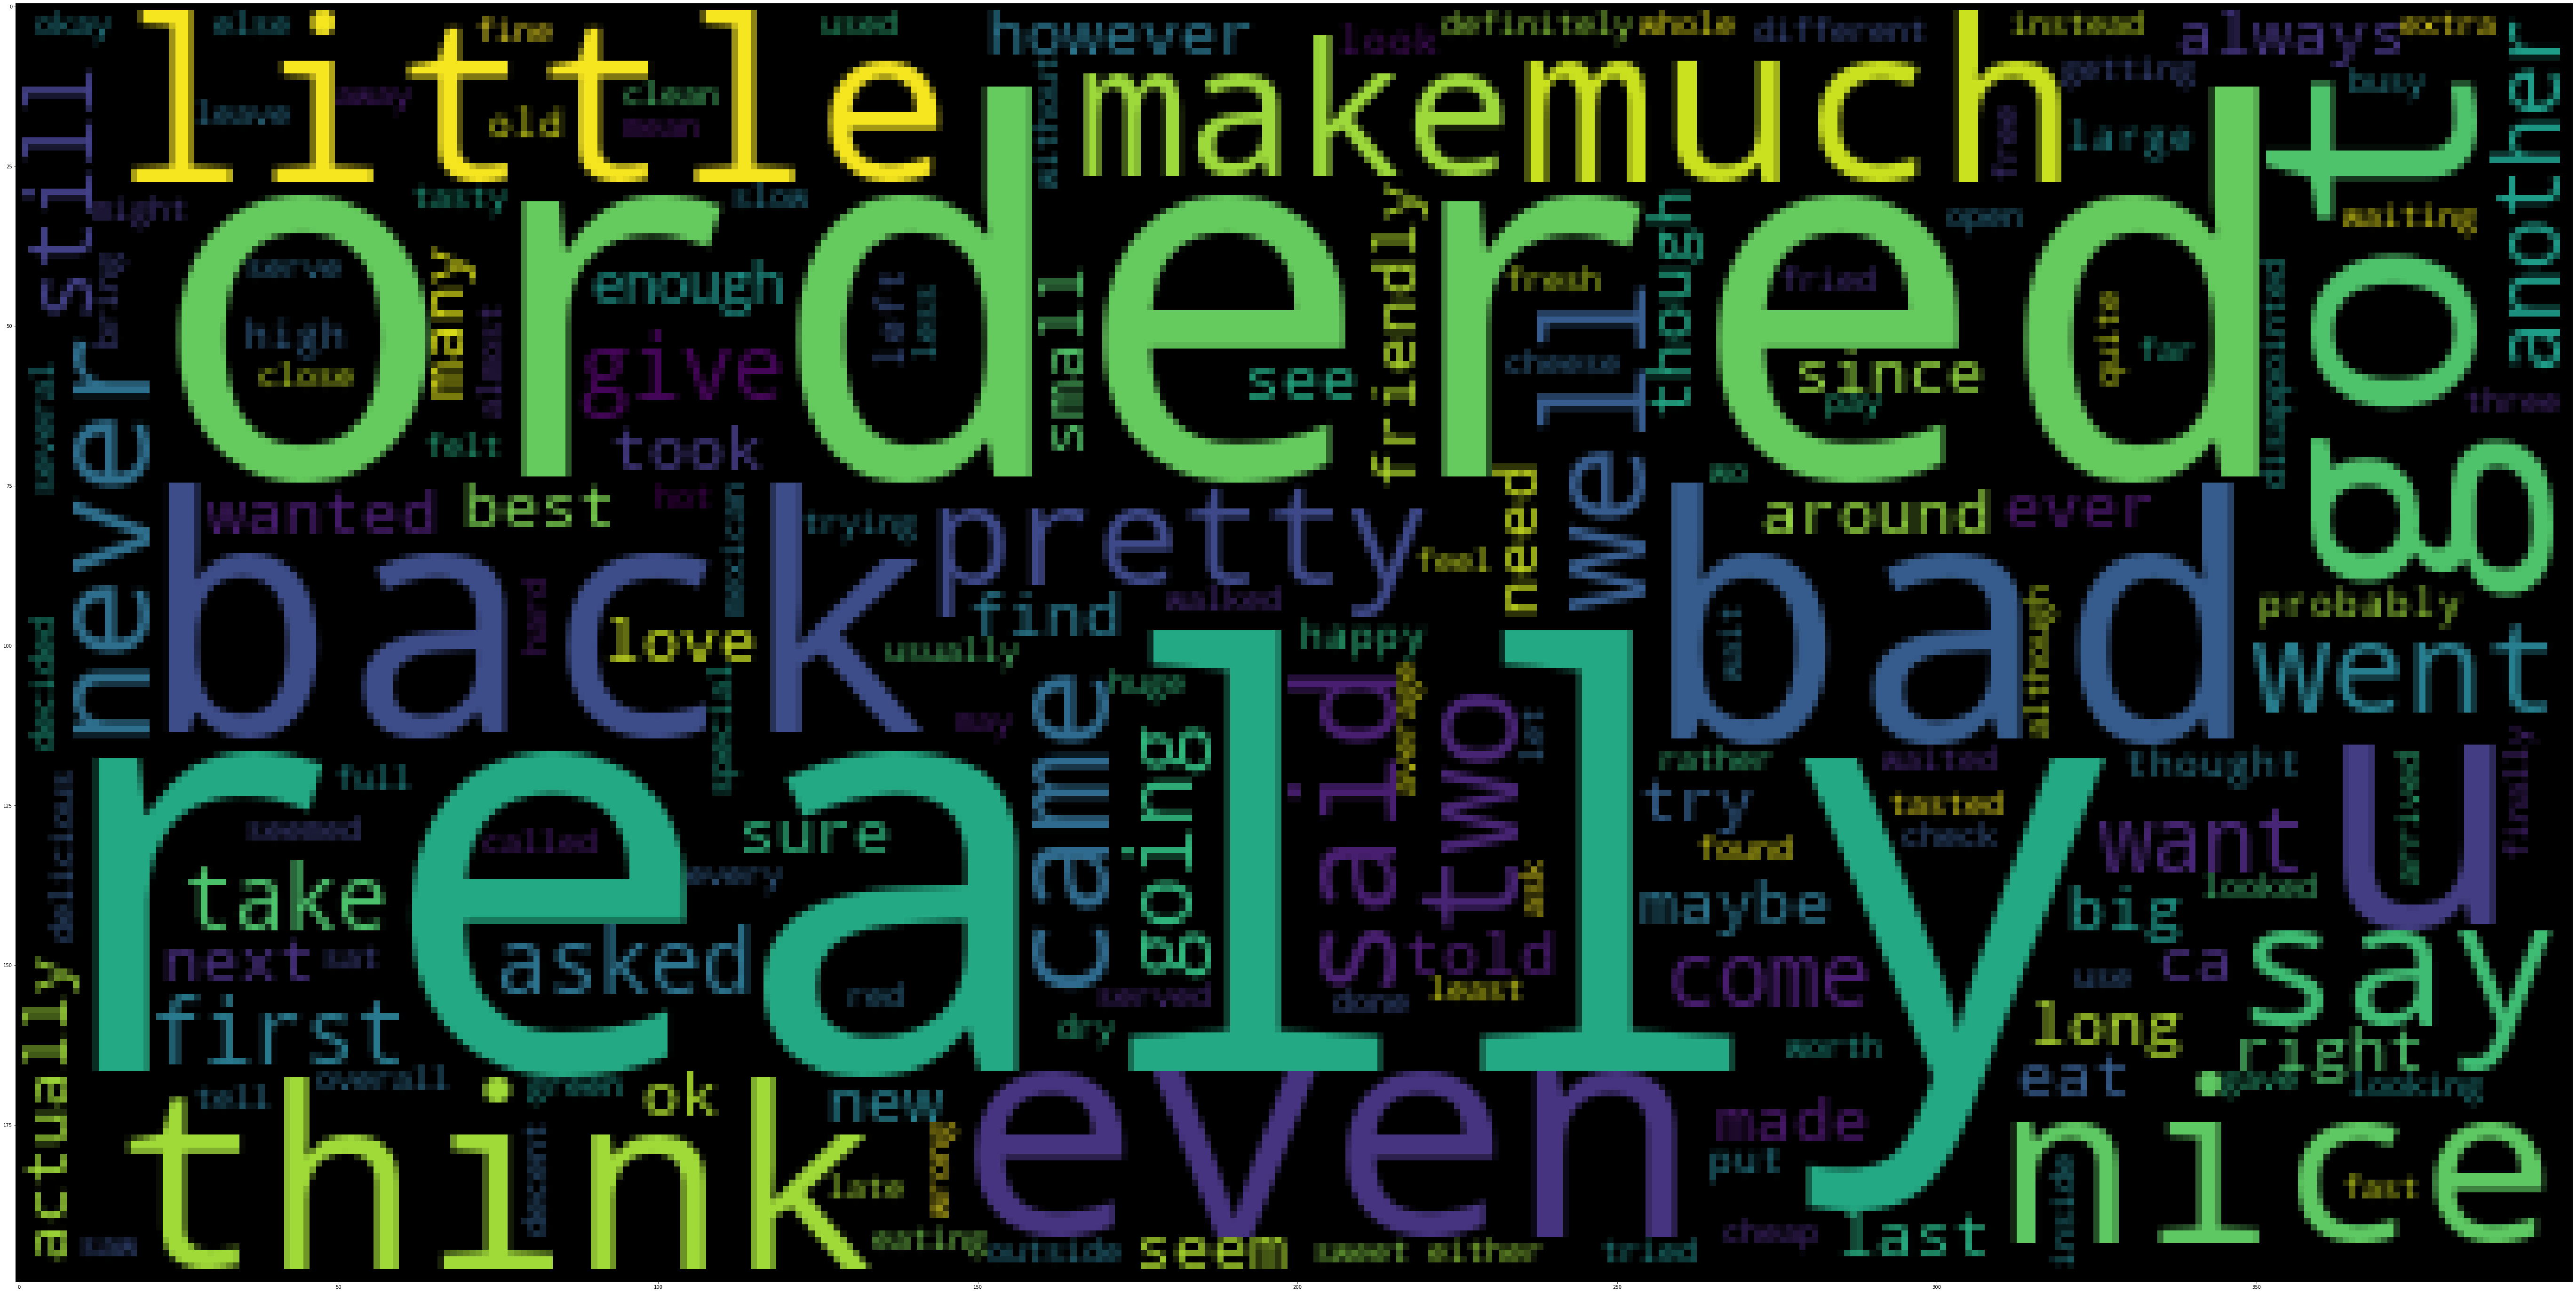

In [328]:
wordcloud = WordCloud(stopwords=stop).generate(''.join(negative_reviews['text']))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

#### Text Classification

In [329]:
yelp['Is_negative']=np.where(yelp.stars>=4,0,1)

C:\Users\gaura\AppData\Local\Temp\ipykernel_1444\4084322750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['Is_negative']=np.where(yelp.stars>=4,0,1)


In [330]:
yelp

,date,stars,text,type,cool,useful,funny,sentiment_score,word_len,sentiment,Is_negative
0,2011-01-26,5,my wife took me here on my birthday for breakf...,review,2,5,0,0.413580,871,Positive,0
1,2011-07-27,5,i have no idea why some people give bad review...,review,0,0,0,0.220870,1315,Positive,0
2,2012-06-14,4,love the gyro plate rice is so good and i als...,review,0,1,0,0.600000,73,Positive,0
3,2010-05-27,5,rosie dakota and i love chaparral dog park ...,review,1,2,0,0.493333,414,Positive,0
4,2012-01-05,5,general manager scott petello is a good egg ...,review,0,0,0,0.361111,453,Positive,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,first visit had lunch here today used my gro...,review,1,2,0,0.217708,649,Positive,1
9996,2012-01-18,4,should be called house of deliciousness i cou...,review,0,0,0,0.375541,877,Positive,0
9997,2010-11-16,4,i recently visited olive and ivy for business ...,review,0,0,0,0.256820,1408,Positive,0
9998,2012-12-02,2,my nephew just moved to scottsdale recently so...,review,0,0,0,-0.100000,850,Neurtal,1


In [331]:
x=yelp.text
y=yelp.Is_negative

In [332]:
train_x,test_x,train_y,test_y=train_test_split(x, y, test_size=0.3, random_state=70)

In [333]:
train_x.shape

(6988,)

In [334]:
test_x.shape

(2995,)

In [335]:
#### Vectorization of the text

In [336]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_x)
X_test_tfidf = tfidf_vect.transform(test_x)

In [337]:
X_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17676311, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24141182, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19637479, 0.        , 0.        , ..., 0.        , 0.14019535,
        0.        ],
       [0.04886669, 0.17865627, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11091631, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [338]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [339]:
dtm_tfidf_train

,a,able,about,above,absolutely,across,actually,add,added,after,...,years,yelp,yes,yet,you,young,your,yourself,yum,yummy
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.090083,0.000000,0.137934,0.0,0.000000,0.000000
1,0.176763,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.241412,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.119900,0.000000,0.000000,0.0,0.000000,0.000000
3,0.082083,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.061151,0.000000,0.000000,0.0,0.000000,0.000000
4,0.062487,0.000000,0.063907,0.0,0.0,0.0,0.0,0.0,0.136132,0.077725,...,0.0,0.0,0.0,0.0,0.046553,0.000000,0.000000,0.0,0.133832,0.113299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,0.038143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.056833,0.000000,0.000000,0.0,0.000000,0.000000
6984,0.054885,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6985,0.196375,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.081421,...,0.0,0.0,0.0,0.0,0.097532,0.000000,0.000000,0.0,0.140195,0.000000
6986,0.048867,0.178656,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [340]:
#### Model Training

In [341]:
from sklearn.svm import LinearSVC

In [342]:
svc=LinearSVC(C=1)

In [343]:
lsvc_model=svc.fit(dtm_tfidf_train,train_y)

In [346]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print("Test Data report")
print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4753
           1       0.85      0.77      0.81      2235

    accuracy                           0.88      6988
   macro avg       0.87      0.85      0.86      6988
weighted avg       0.88      0.88      0.88      6988

Test Data report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2098
           1       0.73      0.68      0.71       897

    accuracy                           0.83      2995
   macro avg       0.80      0.79      0.79      2995
weighted avg       0.83      0.83      0.83      2995



In [347]:
lsvc_model.predict(dtm_tfidf_test)

array([0, 0, 0, ..., 0, 1, 0])

In [369]:
review="""I dont like this place! I have been coming here for many times. 
the food is very bad \nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich.
The atmosphere is always fun and the art they display is very abstract but totally cool!"""

In [370]:
review

"I dont like this place! I have been coming here for many times. \nthe food is very bad \nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich.\nThe atmosphere is always fun and the art they display is very abstract but totally cool!"

In [371]:
review=' '.join([lemmatizer.lemmatize(word,pos='a') for word in word_tokenize(review)])

In [372]:
review

"I dont like this place ! I have been coming here for many times . the food is very bad My favorites : Elsa 's Chicken sandwich , any of their burgers , dragon chicken wings , china 's little chicken sandwich , and the hot pepper chicken sandwich . The atmosphere is always fun and the art they display is very abstract but totally cool !"

In [378]:
review=''.join(list(clean_text(review)))

In [389]:
review=[str(review)]

In [390]:
review

['i dont like this place  i have been coming here for many times  the food is very bad my favorites  elsa s chicken sandwich  any of their burgers  dragon chicken wings  china s little chicken sandwich  and the hot pepper chicken sandwich  the atmosphere is always fun and the art they display is very abstract but totally cool']

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [392]:
lsvc_model.predict(tfidf_vect.transform(review))[0]

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


0

#### Now we will make another model to predict the stars

In [401]:
x=yelp.text
y=yelp.stars

In [402]:
train_x,test_x,train_y,test_y=train_test_split(x, y, test_size=0.3, random_state=70)

In [403]:
train_x.shape

(6988,)

In [404]:
test_x.shape

(2995,)

In [405]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_x)
X_test_tfidf = tfidf_vect.transform(test_x)

In [406]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [407]:
from sklearn.svm import LinearSVC

In [408]:
svc=LinearSVC(C=1)

In [409]:
lsvc_model=svc.fit(dtm_tfidf_train,train_y)

In [410]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print("Test Data report")
print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80       524
           2       0.77      0.59      0.67       675
           3       0.68      0.52      0.59      1036
           4       0.66      0.72      0.69      2477
           5       0.72      0.77      0.74      2276

    accuracy                           0.70      6988
   macro avg       0.72      0.68      0.70      6988
weighted avg       0.70      0.70      0.70      6988

Test Data report
              precision    recall  f1-score   support

           1       0.52      0.43      0.48       223
           2       0.31      0.24      0.27       251
           3       0.39      0.29      0.33       423
           4       0.48      0.57      0.52      1047
           5       0.60      0.61      0.61      1051

    accuracy                           0.51      2995
   macro avg       0.46      0.43      0.44      2995
weighted avg       0.50      0.51      0.50      2995



In [411]:
lsvc_model.predict(dtm_tfidf_test)

array([4, 5, 5, ..., 5, 1, 5], dtype=int64)

In [449]:
review="""This restraunt was a complete disappointment. Food arrived late, and when I finally got it, it was not cooked well. The quality was poor. I would not recommend it to anyone."""

In [450]:
review=' '.join([lemmatizer.lemmatize(word,pos='a') for word in word_tokenize(review)])
review=''.join(list(clean_text(review)))

In [451]:
review=[str(review)]

In [452]:
lsvc_model.predict(tfidf_vect.transform(review))[0]

1